In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rcParams
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
rcParams['axes.linewidth']=2
rcParams['text.usetex']=True#True
fs =25
#path = "/home/jalil/Projects2023/TDNEGF/TDNEGF/data/"
path = "./data"

In [11]:
# name1 = 'res_U0_w12'
# name2 = 'res_U01_w12'
# name3 = 'res_U05_w12'
# name4 = 'res_U0_w05'
# name5 = 'res_U01_w05'
# name6 = 'res_U05_w05'
name1 = "L10_Jex_01_z_02_nomag"
name2= "L10_Jex_01_z_02_mag"
name3 = "L10_Jex_01_z_02_U05_nomag"
name4 = "L10_Jex_01_z_02_U05_mag"
names = [name1,name2,name3,name4]#,name5,name6] 
#--------------------------------------------------------- Data from the TDNEGF code
data = {}
for name in names:
    data[f"cspins_f_{name}"] = np.loadtxt(f"{path}/cspins_{name}_jl.txt" )
    data[f"sc_f_{name}"] = np.loadtxt(f"{path}/sc_{name}_jl.txt" )
    data[f"cc_f_{name}"] = np.loadtxt(f"{path}/cc_{name}_jl.txt" ) ;
    

# cspins_ = np.loadtxt(f"{path}/cspins_{name1}_jl.txt" )
# cspins_ = np.loadtxt(f"{path}/cspins_{name2}_jl.txt" )
# cspins_f_06 = np.loadtxt(f"{path}/cspins_{name3}_jl.txt" )
# cspins_f_12 = np.loadtxt(f"{path}/cspins_{name4}_jl.txt" )

In [35]:
data.keys()#[f"cspins_f_{name4}"]
#data[f"sc_f_{name3}"]

dict_keys(['cspins_f_res_U0_w12', 'cspins_f_res_U05_w12', 'cspins_f_res_U15_w12', 'cspins_f_res_U0_w05', 'cspins_f_res_U05_w05', 'cspins_f_res_U15_w05', 'sc_f_res_U0_w12', 'cc_f_res_U0_w12'])

In [9]:
def fourier_transform(times,data,dt):
    """ This function calculates the FFT tranformation of a set of data
    """
    from scipy.fft import fft, fftfreq ### Import functions to make the FFT
    N = times.size                     ### Calculate the size of the data set
    # This computes the complex Fourier coeffients, representing
    #  the amplitude and phase information for each frquency
    yif = np.fft.fft(data)             ### Apply the FFT algorithm to the data 
    yf = abs(yif[0:N//2])              ### We only consider the first half of the spectrum
                                       ### since the FFT output is symmetric due to the propt.
                                       ### of real input signals
    yf= (2/N)*yf                       ### Normalice the amplitudes and the factor of two 
                                       ### accounts for the symmetry in the spectrum are properly scaled 
    # This Calculates the optimal frequencies based on the number of data points and the time interval 
    # between consecutive points
    xf = np.fft.fftfreq(N,dt)[0:N//2]  ### Generates the correspoding frqeuncy values for each data point 
    return xf, yf

In [163]:
from scipy.interpolate import interp1d

(0.0, 10.0)

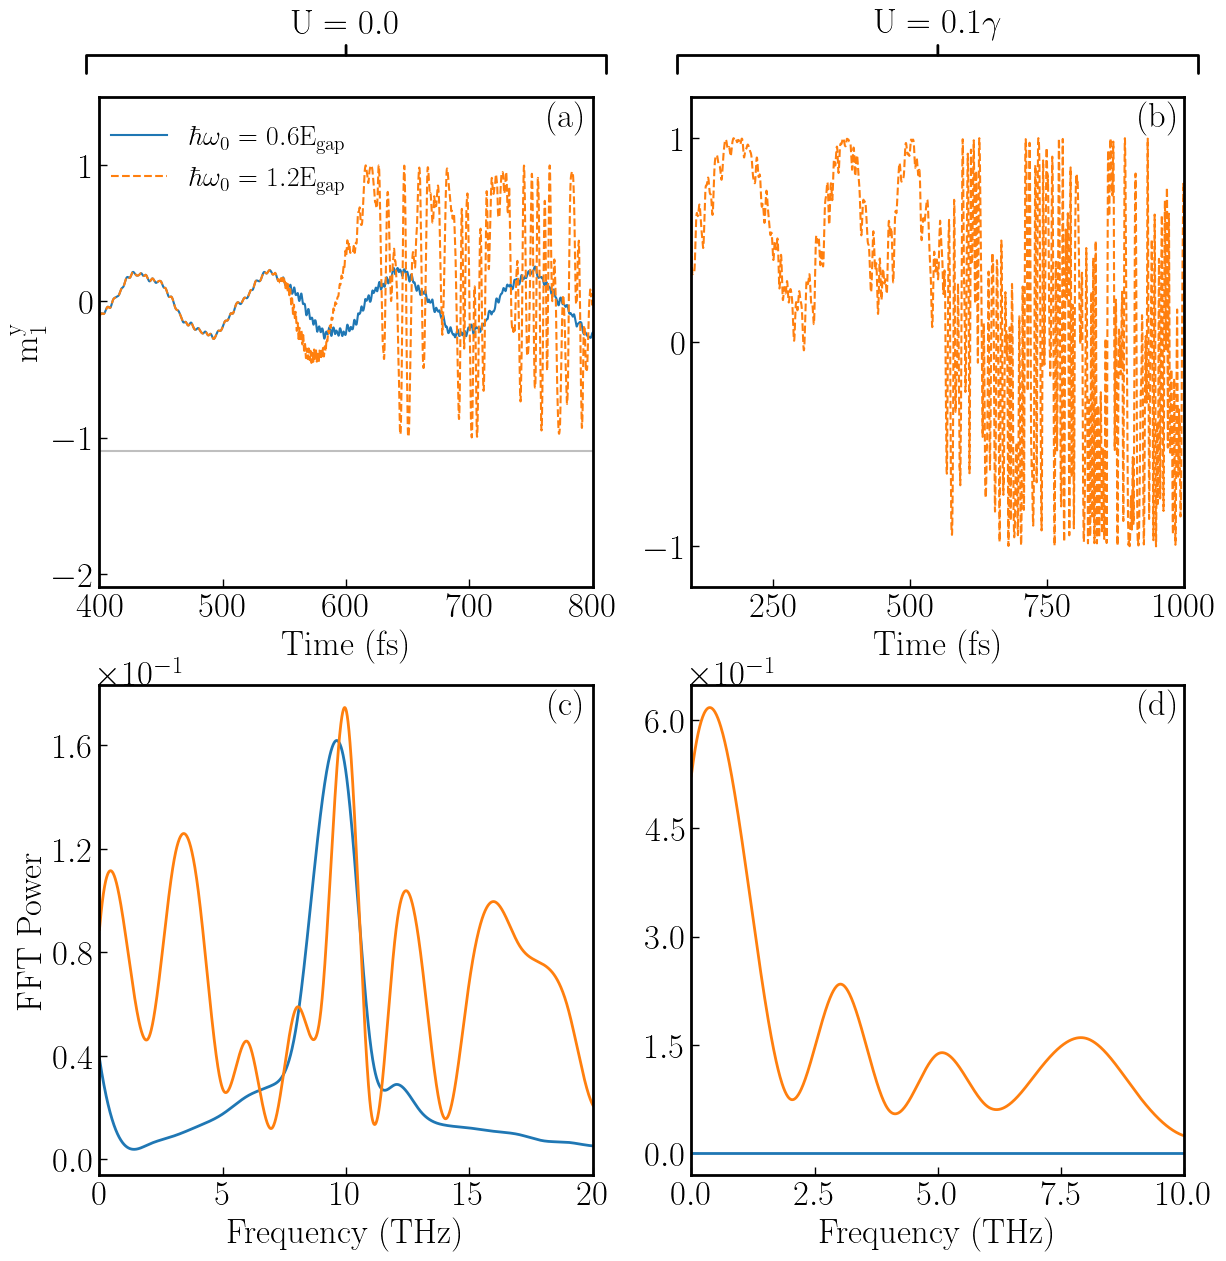

In [24]:
fig,axs=plt.subplots(2,2,figsize=(14,14) )#,sharex='col')
axes = axs.reshape(4)
site=8

axes[0].plot(cspins_f_06[:,0],cspins_f_06[:,site*3+2],label = r'$\hbar\omega_0 = 0.6\mathrm{E_{gap}}$')
axes[0].plot(cspins_f_12[:,0],cspins_f_12[:,site*3+2],ls='--',label = r'$\hbar\omega_0 = 1.2\mathrm{E_{gap}}$')

site=8
axes[1].plot(cspins_af_06[:,0],cspins_af_06[:,site*3+2])
axes[1].plot(cspins_af_12[:,0],cspins_af_12[:,site*3+2],ls='--')


W1,F1 = fourier_transform(cspins_f_06[:,0],cspins_f_06[:,site*3+2], 0.1)
W1 = W1[::1]*1000#omega#/(2*np.pi)#*T1 
f = interp1d(W1[::1],F1[::1], kind='cubic')
x = np.arange(0,40,0.01)
axes[2].plot(x,f(x),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')

W1,F1 = fourier_transform(cspins_f_12[:,0],cspins_f_12[:,site*3+2], 0.1)
W1 = W1[::1]*1000#omega#/(2*np.pi)#*T1 
f = interp1d(W1[::1],F1[::1], kind='cubic')
x = np.arange(0,40,0.01)
axes[2].plot(x,f(x),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')


W1,F1 = fourier_transform(cspins_af_06[:,0],cspins_af_06[:,site*3+2], 0.1)
W1 = W1[::1]*1000#omega#/(2*np.pi)#*T1 
f = interp1d(W1[::1],F1[::1], kind='cubic')
x = np.arange(0,40,0.01)
axes[3].plot(x,f(x),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')

W1,F1 = fourier_transform(cspins_af_12[:,0],cspins_af_12[:,site*3+2], 0.1)
W1 = W1[::1]*1000#omega#/(2*np.pi)#*T1 
f = interp1d(W1[::1],F1[::1], kind='cubic')
x = np.arange(0,40,0.01)
axes[3].plot(x,f(x),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')


axes[0].annotate(r'$\mathrm{U=0.0} $', xy=(0.5, 1.08), xytext=(0.5, 1.18), xycoords='axes fraction', 
           fontsize=fs, ha='center', va='top', rotation=0.0,
           arrowprops=dict(arrowstyle='-[, widthB=7.5, lengthB=0.5', lw=2.0))
axes[1].annotate(r'$\mathrm{U=0.1\gamma} $', xy=(0.5, 1.08), xytext=(0.5, 1.18), xycoords='axes fraction', 
           fontsize=fs, ha='center', va='top', rotation=0.,
           arrowprops=dict(arrowstyle='-[, widthB=7.5, lengthB=0.5', lw=2.0))


axes[0].set_xlabel(r'$\mathrm{Time\ (fs)}$',fontsize=fs)
axes[1].set_xlabel(r'$\mathrm{Time\ (fs)}$',fontsize=fs)
axes[0].set_ylabel(r'$\mathrm{m_1^y}$',fontsize=fs)

axes[2].set_ylabel(r'$\mathrm{FFT \ Power}$',fontsize=fs)
axes[2].set_xlabel(r'$\mathrm{Frequency\ (THz)}$',fontsize=fs)
axes[3].set_xlabel(r'$\mathrm{Frequency\ (THz)}$',fontsize=fs)
index=[r'$\rm{(a)}$',r'$\rm{(b)}$',r'$\rm{(c)}$',r'$\rm{(d)}$',r'$\rm{(e)}$',r'$\rm{(f)}$',r'$\rm{(g)}$',r'$\rm{(h)}$' ]#['(a)','(b)','(c)','(d)']
i=0
for axs in axes:
    axs.text(x=0.95, y=0.94, s=index[i],fontsize=fs,ha='center', transform=axs.transAxes)
#axs.text(x=0.95, y=0.93, s=index[i],fontsize=fs,ha='center', transform=ax.transAxes)
    axs.yaxis.set_major_locator(plt.MaxNLocator(5,integer=True))
    axs.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
    axs.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
    axs.yaxis.offsetText.set_fontsize(fs)
    i=i+1

axes[0].axhline([-1.1],color='gray',alpha=0.5)
#axes[0].plot(ts,pulse1-1.1,alpha=0.7)
#axes[0].plot(ts,pulse2-1.1,ls='-',alpha =0.4)
axes[0].legend(fontsize=fs-5,loc= (0.001,  0.78),frameon=False )#,ncol=3, columnspacing=0.3)
axes[0].set_xlim([400,800])
axes[1].set_xlim([100,1000])
axes[0].set_ylim([-2.1,1.5])
axes[1].set_ylim([-1.2,1.2])
axes[2].set_xlim([0,20])
axes[3].set_xlim([0,10])
#plt.savefig('rice_mele_model+light.pdf')

In [99]:
ts = np.arange(0,1000+200,0.1)#np.linspace(0,100,500)

hbar = 0.658211928e0 # (eV*fs)
E_g = 2.28#2.0#4.0##2.28 # in EV or units of the Hamiltonian
### The energy is 2.28
Omega_0 = E_g/(hbar)#*0.5#1.2

A_max = 1#0.5
sigma = 25
t_p = 4*sigma + 200
#Omega_0 = Omega_3
#ts = np.arange(0,8*sigma,0.1)#np.linspace(0,100,500)
def A(t,Omega_0=Omega_0):
    return A_max*np.exp(-(t-t_p)**2/(2*sigma^2))*np.sin(Omega_0*t)

As_1=[A(t,Omega_0=Omega_0*1.2) for t in ts ] #np.loadtxt('pulse_12_gap.txt')
As_0 = [A(t,Omega_0=Omega_0*0.5) for t in ts ]   #np.loadtxt('pulse_05_gap.txt')
#pulse2=np.loadtxt('pulse_test_5.txt')
#ts = np.arange(500,600,0.1)#np.linspace(0,100,500)

In [7]:
def avg_mag(name):
    L= 10#(np.shape(cspins_f)[1]-1)//3
    avgy_t = 0.0

    for site in [0,L-1]:
        #avgx_t +=cspins_f[:,site*3+1]
        avgy_t +=data[f"cspins_f_{name}"][:,site*3+2]
        #avgz_t +=cspins_f[:,site*3+3]
    
    #avgx_t= avgx_t/L
    return avgy_t/L


n1=avg_mag(name1)

n2=avg_mag(name2)

n3=avg_mag(name3)

n6=avg_mag(name6)

n4=avg_mag(name4)

n5=avg_mag(name5)

#avgz_t= avgz_t/L


In [12]:
#site=0
#data[f"cspins_f_{name4}"][:,site*3+2]



n1 = avg_mag(name1)

n2 = avg_mag(name2)


n3 = avg_mag(name3)

n4 = avg_mag(name4)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


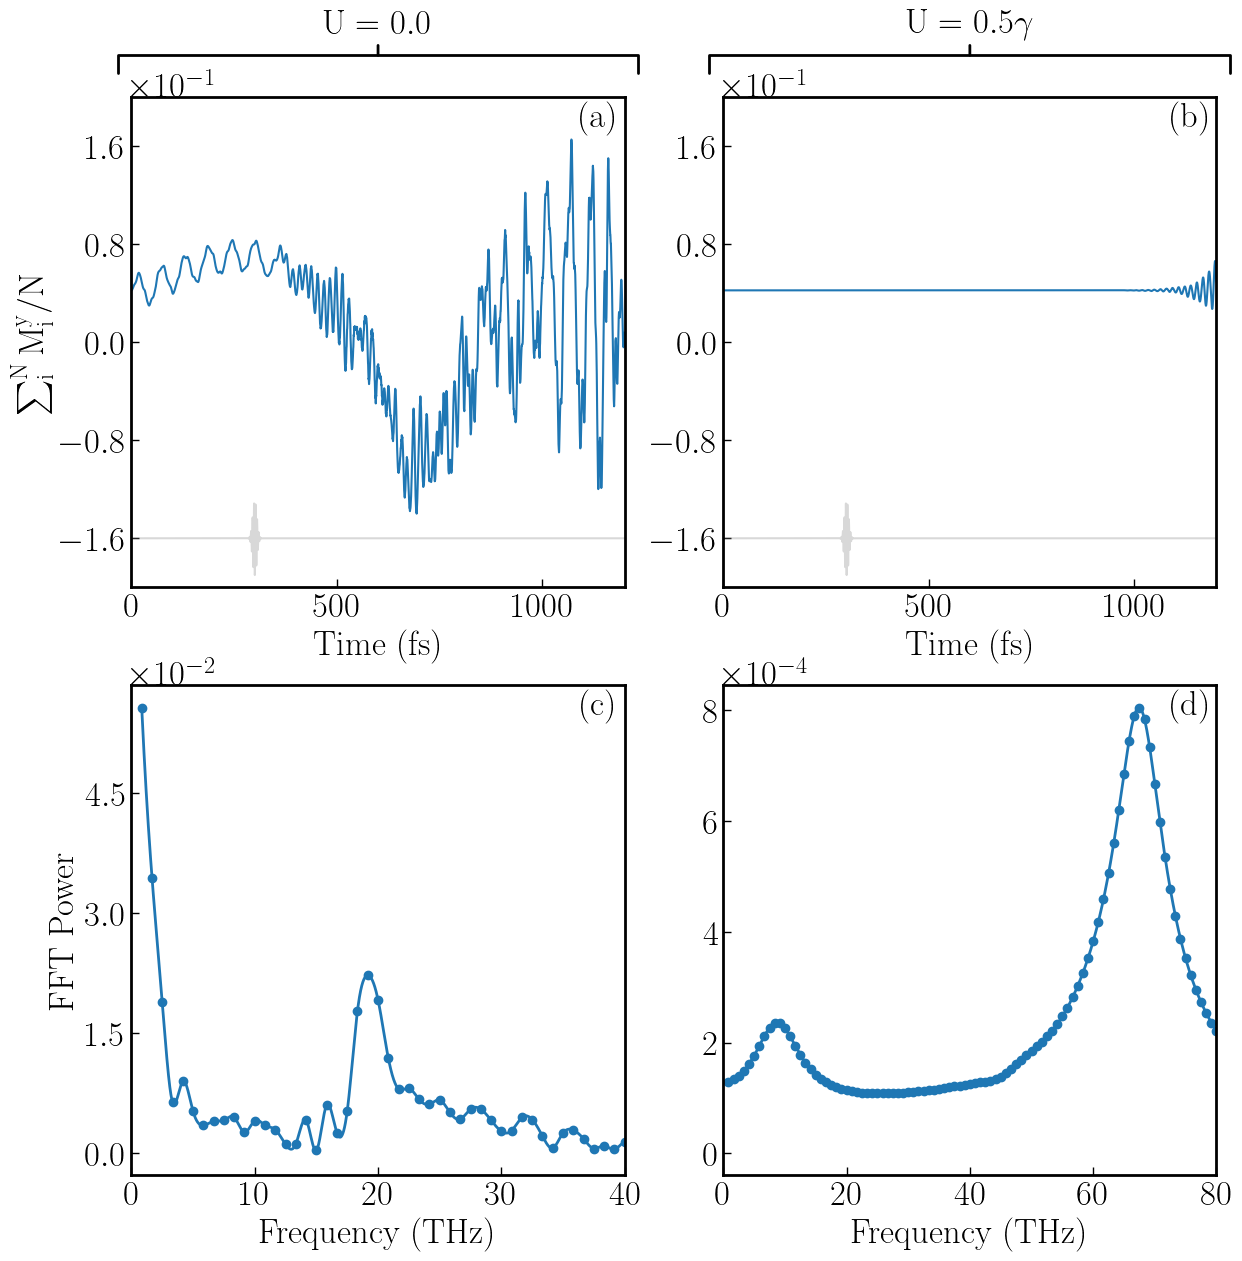

In [127]:
from scipy.interpolate import interp1d
fig,axs=plt.subplots(2,2,figsize=(14,14) )#,sharex='col')
axes = axs.reshape(4)
site=1




# axes[0].plot(data[f"cspins_f_{name4}"][:,0],n4,label = r'$U=0.0 $')
# axes[0].plot(data[f"cspins_f_{name5}"][:,0],n6,label = r'$U=0.1 \mathrm{\gamma}$')

axes[0].plot(data[f"cspins_f_{name2}"][:,0],n2)#,label = r'$U=0.0 $')
#axes[0].plot(data[f"cspins_f_{name5}"][:,0],n6,label = r'$U=0.1 \mathrm{\gamma}$')




axes[1].plot(data[f"cspins_f_{name4}"][:,0],n4)


# axes[1].plot(data[f"cspins_f_{name1}"][:,0],n1,label = r'$U=0.0$')
# axes[1].plot(data[f"cspins_f_{name2}"][:,0],n3,label = r'$U=0.1$')
#axes[0].plot(data[f"cspins_f_{name3}"][:,0],data[f"cspins_f_{name3}"][:,site*3+2],label = r'$U=0.5$')
#axes[0].plot(cspins_f_12[:,0],cspins_f_12[:,site*3+2],ls='--',label = r'$\hbar\omega_0 = 1.2\mathrm{E_{gap}}$')

#site=8
#axes[1].plot(cspins_af_06[:,0],cspins_af_06[:,site*3+2])
#axes[1].plot(cspins_af_12[:,0],cspins_af_12[:,site*3+2],ls='--')

t0= 0#5000#010000#10000#1000#10000#400#10000
tf= 12000
W1,F1 = fourier_transform(data[f"cspins_f_{name2}"][:,0],n2[t0:tf],0.1)#cspins_f[t0:tf,site*3+3], 0.1)
#W1,F1 = fourier_transform(cspins_f[t0:tf,0],cspins_f[t0:tf,site*3+3], 0.1)
W1 = W1[::1]*1000#**2#omega#/(2*np.pi)#*T1 
f = interp1d(W1[1::1],F1[1::1], kind='cubic')#,fill_value="extrapolate")
x = np.arange(0.85,40,0.001)
axes[2].scatter(W1[1::1],F1[1::1],ls ='-')#,markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')
axes[2].plot(x,np.abs(f(x)),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')

# t0= 0#5000#010000#10000#1000#10000#400#10000
# tf= 200000
# W1,F1 = fourier_transform(data[f"cspins_f_{name4}"][:,0],n6[t0:tf],0.1)#cspins_f[t0:tf,site*3+3], 0.1)
# #W1,F1 = fourier_transform(cspins_f[t0:tf,0],cspins_f[t0:tf,site*3+3], 0.1)
# W1 = W1[::1]*1000#**2#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[1::1],F1[1::1], kind='cubic')#,fill_value="extrapolate")
# x = np.arange(1.0,40,0.001)
# axes[2].scatter(W1[1::1],F1[1::1],ls ='-')#,markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')
# axes[2].plot(x,np.abs(f(x)),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')


t0= 0#5000#010000#10000#1000#10000#400#10000
tf= 12000
W1,F1 = fourier_transform(data[f"cspins_f_{name4}"][:,0],n4[t0:tf],0.1)#cspins_f[t0:tf,site*3+3], 0.1)
#W1,F1 = fourier_transform(cspins_f[t0:tf,0],cspins_f[t0:tf,site*3+3], 0.1)
W1 = W1[::1]*1000#**2#omega#/(2*np.pi)#*T1 
f = interp1d(W1[1::1],F1[1::1], kind='cubic')#,fill_value="extrapolate")
x = np.arange(0.85,80,0.001)
axes[3].scatter(W1[1::1],F1[1::1],ls ='-')#,markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')
axes[3].plot(x,np.abs(f(x)),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')




# t0= 15000#5000#010000#10000#1000#10000#400#10000
# tf= 20000
# W1,F1 = fourier_transform(data[f"cspins_f_{name4}"][t0:tf,0],n1[t0:tf],0.1)#cspins_f[t0:tf,site*3+3], 0.1)
# #W1,F1 = fourier_transform(cspins_f[t0:tf,0],cspins_f[t0:tf,site*3+3], 0.1)
# W1 = W1[::1]*1000#**2#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[1::1],F1[1::1], kind='cubic')#,fill_value="extrapolate")
# x = np.arange(2.0,80,0.001)
# axes[3].scatter(W1[1::1],F1[1::1],ls ='-')#,markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')
# axes[3].plot(x,np.abs(f(x)),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')

# W1,F1 = fourier_transform(data[f"cspins_f_{name4}"][t0:tf,0],n3[t0:tf],0.1)#cspins_f[t0:tf,site*3+3], 0.1)
# #W1,F1 = fourier_transform(cspins_f[t0:tf,0],cspins_f[t0:tf,site*3+3], 0.1)
# W1 = W1[::1]*1000#**2#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[1::1],F1[1::1], kind='cubic')#,fill_value="extrapolate")
# x = np.arange(2.0,80,0.001)
# axes[3].scatter(W1[1::1],F1[1::1],ls ='-')#,markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')
# axes[3].plot(x,np.abs(f(x)),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')



# W1,F1 = fourier_transform(cspins_f_06[:,0],cspins_f_06[:,site*3+2], 0.1)
# W1 = W1[::1]*1000#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[::1],F1[::1], kind='cubic')
# x = np.arange(0,40,0.01)
# axes[2].plot(x,f(x),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')

# W1,F1 = fourier_transform(cspins_f_12[:,0],cspins_f_12[:,site*3+2], 0.1)
# W1 = W1[::1]*1000#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[::1],F1[::1], kind='cubic')
# x = np.arange(0,40,0.01)
# axes[2].plot(x,f(x),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')


# W1,F1 = fourier_transform(cspins_af_06[:,0],cspins_af_06[:,site*3+2], 0.1)
# W1 = W1[::1]*1000#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[::1],F1[::1], kind='cubic')
# x = np.arange(0,40,0.01)
# axes[3].plot(x,f(x),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')

# W1,F1 = fourier_transform(cspins_af_12[:,0],cspins_af_12[:,site*3+2], 0.1)
# W1 = W1[::1]*1000#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[::1],F1[::1], kind='cubic')
# x = np.arange(0,40,0.01)
# axes[3].plot(x,f(x),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')


# axes[0].annotate(r'$\mathrm{U} = \mathrm{0.5E_{gap}}$', xy=(0.5, 1.08), xytext=(0.5, 1.18), xycoords='axes fraction', 
#            fontsize=fs, ha='center', va='top', rotation=0.0,
#            arrowprops=dict(arrowstyle='-[, widthB=7.5, lengthB=0.5', lw=2.0))
# axes[1].annotate(r'$\hbar\omega_0 = 1.2\mathrm{E_{gap}}$', xy=(0.5, 1.08), xytext=(0.5, 1.18), xycoords='axes fraction', 
#            fontsize=fs, ha='center', va='top', rotation=0.,
#            arrowprops=dict(arrowstyle='-[, widthB=7.5, lengthB=0.5', lw=2.0))


axes[0].annotate(r'$\mathrm{U=0.0} $', xy=(0.5, 1.08), xytext=(0.5, 1.18), xycoords='axes fraction', 
           fontsize=fs, ha='center', va='top', rotation=0.0,
           arrowprops=dict(arrowstyle='-[, widthB=7.5, lengthB=0.5', lw=2.0))
axes[1].annotate(r'$\mathrm{U=0.5\gamma} $', xy=(0.5, 1.08), xytext=(0.5, 1.18), xycoords='axes fraction', 
           fontsize=fs, ha='center', va='top', rotation=0.,
           arrowprops=dict(arrowstyle='-[, widthB=7.5, lengthB=0.5', lw=2.0))


axes[0].set_xlabel(r'$\mathrm{Time\ (fs)}$',fontsize=fs)
axes[1].set_xlabel(r'$\mathrm{Time\ (fs)}$',fontsize=fs)
axes[0].set_ylabel(r'$\mathrm{\sum_i^N M_i^y/N}$',fontsize=fs)

axes[2].set_ylabel(r'$\mathrm{FFT \ Power}$',fontsize=fs)
axes[2].set_xlabel(r'$\mathrm{Frequency\ (THz)}$',fontsize=fs)
axes[3].set_xlabel(r'$\mathrm{Frequency\ (THz)}$',fontsize=fs)
index=[r'$\rm{(a)}$',r'$\rm{(b)}$',r'$\rm{(c)}$',r'$\rm{(d)}$',r'$\rm{(e)}$',r'$\rm{(f)}$',r'$\rm{(g)}$',r'$\rm{(h)}$' ]#['(a)','(b)','(c)','(d)']
i=0
for axs in axes:
    axs.text(x=0.95, y=0.94, s=index[i],fontsize=fs,ha='center', transform=axs.transAxes)
#axs.text(x=0.95, y=0.93, s=index[i],fontsize=fs,ha='center', transform=ax.transAxes)
    axs.yaxis.set_major_locator(plt.MaxNLocator(5,integer=True))
    axs.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
    axs.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
    axs.yaxis.offsetText.set_fontsize(fs)
    i=i+1

#axes[0].axhline([-1.1],color='gray',alpha=0.5)

#axes[0].plot(ts+1000,np.array(As_0)*5e-3 - 1.5e-2,color = 'gray',alpha = 0.3)
#axes[1].plot(ts,np.array(As_0)*0.008 + 0.2e-1,color = 'gray',alpha = 0.3)
axes[0].plot(ts,np.array(As_0)*0.03 - 1.6e-1,color = 'gray',alpha = 0.3)
axes[1].plot(ts,np.array(As_0)*0.03 - 1.6e-1,color = 'gray',alpha = 0.3)
#axes[1].plot(ts+1000,np.array(As_0)*0.03 - 0.8e-1,color = 'gray',alpha = 0.3)
#axes[1].plot(ts,np.array(As_1)*0.5 - 1.5,color = 'gray',alpha = 0.3)
#axes[0].plot(ts,pulse1-1.1,alpha=0.7)
#axes[0].plot(ts,pulse2-1.1,ls='-',alpha =0.4)
axes[0].legend(fontsize=fs-5,loc= (0.001,  0.78),frameon=False )#,ncol=3, columnspacing=0.3)
#axes[0].set_xlim([400,800])
#axes[1].set_xlim([100,1000])
axes[0].set_ylim([-2e-2-5e-3,2e-2])
axes[1].set_xlim([0,1200])
axes[0].set_xlim([0,1200])
#axes[1].set_xlim([1000,2000])


#axes[0].set_ylim([-1.3e-1-1e-2,1.3e-1])
axes[0].set_ylim([-2e-1,2e-1])

axes[1].set_ylim([-2e-1,2e-1])
#axes[1].set_ylim([0,0.8e-1])
#axes[1].set_ylim([-1.3e-1-1e-2,1.3e-1])
#axes[1].set_ylim([-2e-2-5e-3,2e-2])

axes[2].set_xlim(0,40)
axes[3].set_xlim(0,80)

#axes[2].set_ylim(0,4e-2)
#axes[2].axvline(1.92,color='red') 
#axes[0].set_ylim([-10,10])
#axes[0].set_ylim([-2.1,1.5+1])
#axes[1].set_ylim([-2.1,1.5+1])
#axes[1].set_xlim([0,200])
#axes[1].set_ylim([-1.2,1.2])

#axes[2].set_xlim([0,20])

plt.savefig('rice_mele_model+light_v2.pdf')


In [67]:
data[f"EdtJ_{name1}"] = np.loadtxt(f"./data/Edtj_{name1}_jl.txt" )

FileNotFoundError: ./data/Edtj_L10_Jex_01_z_02_nomag_jl.txt not found.

In [65]:
data[f"EdtJ_{name1}_mag"] = np.loadtxt(f"./data/Edtj_{name1}_mag_jl.txt" )

FileNotFoundError: ./data/Edtj_L10_Jex_01_z_02_nomag_mag_jl.txt not found.

In [66]:
data[f"Jdtj_mag_{name1}"] = np.loadtxt(f"./data/Jdtj_mag_{name1}_jl.txt" )


FileNotFoundError: ./data/Jdtj_mag_L10_Jex_01_z_02_nomag_jl.txt not found.

In [161]:
data[f"Jdtj_mag_{name1}"][0,:]

array([1.000e-01, 2.000e-01, 3.000e-01, ..., 9.988e+02, 9.989e+02,
       9.990e+02])

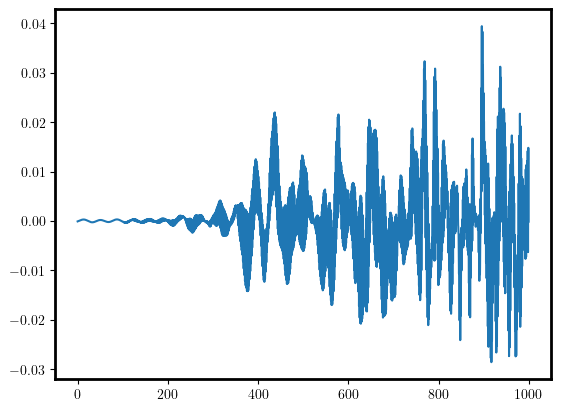

In [164]:
plt.plot(data[f"Jdtj_mag_{name1}"][0,:],data[f"Jdtj_mag_{name1}"][1,:])

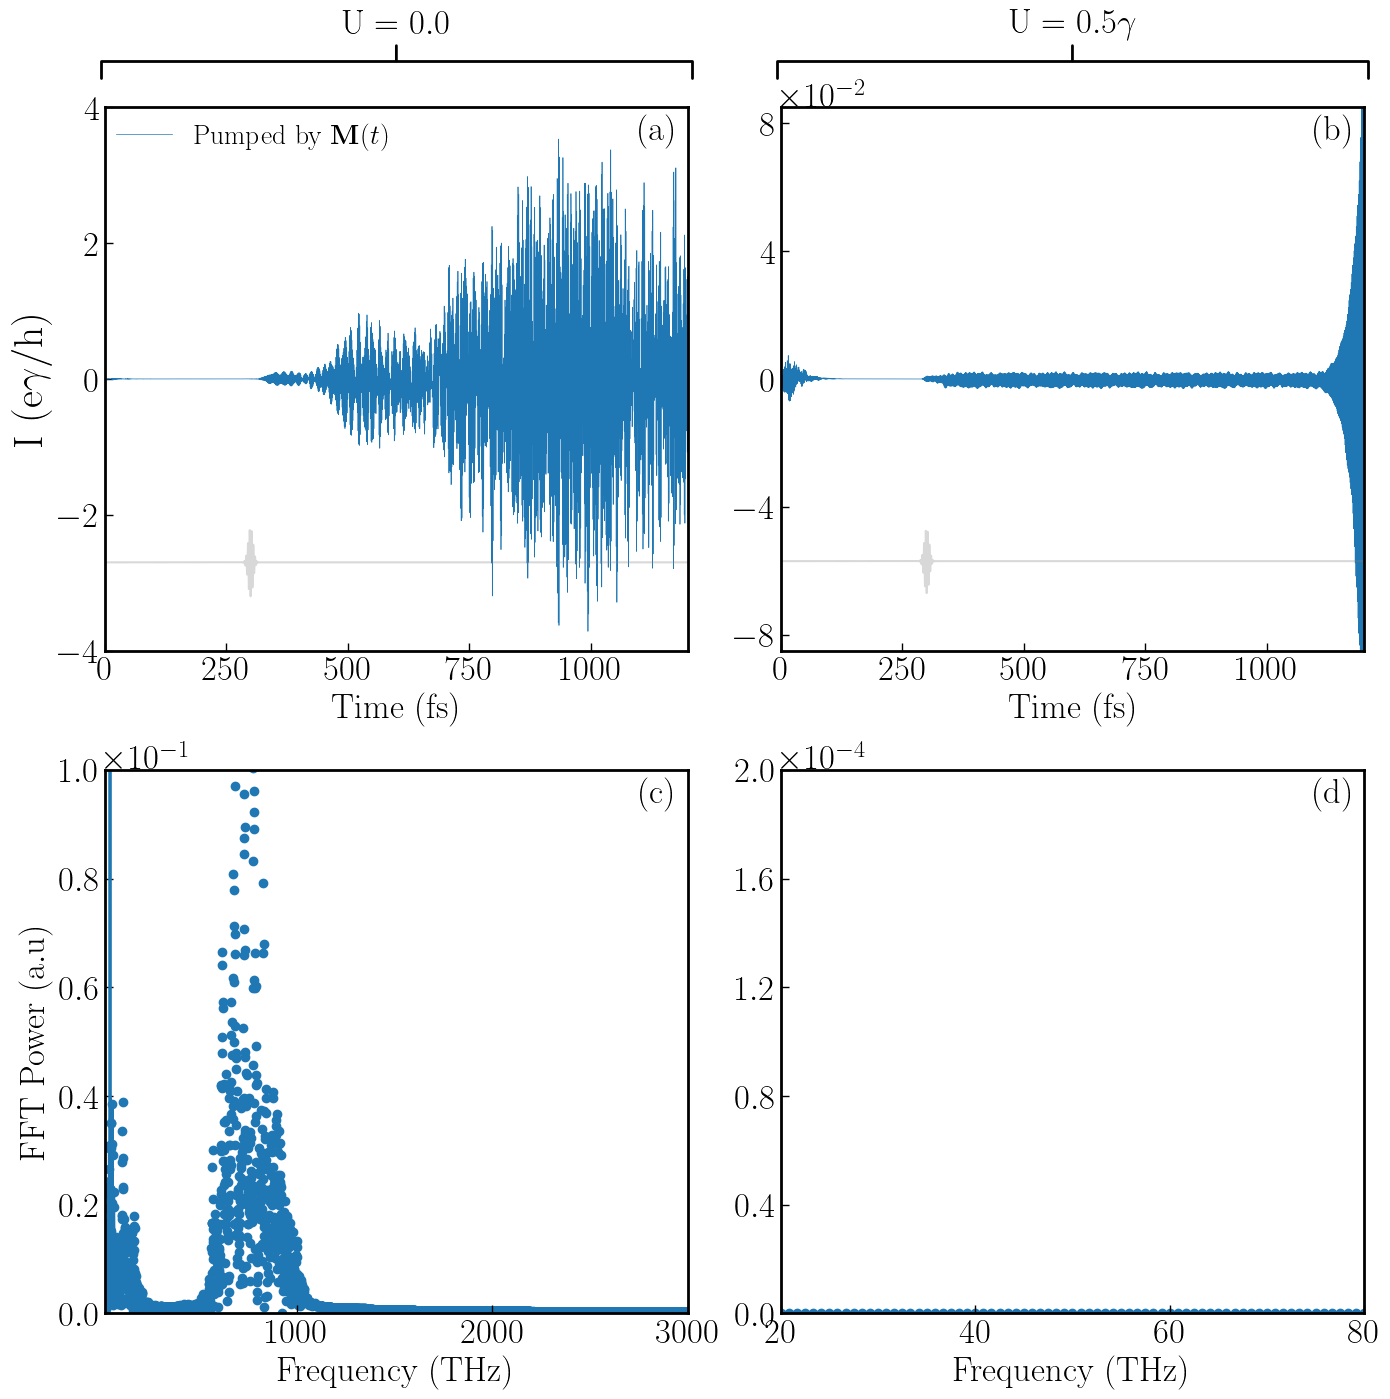

In [140]:
fig,axs=plt.subplots(2,2,figsize=(14,14) )#,sharex='col')
axes = axs.reshape(4)
site=1



#axes[0].plot(data[f"cc_f_{name1}"][:,0],data[f"cc_f_{name1}"][:,2],label = r'$\mathrm{Pumped\ by }\ \mathbf{\sigma}$',color='tab:orange',lw=0.5)
#axes[0].plot(data[f"Jdtj_mag_{name1}"][0,:]+1000,data[f"Jdtj_mag_{name1}"][1,:]*5e1,label = r'$\mathrm{Pumped\ by\ \mathbf{M}}$',color='tab:blue',lw=0.5,alpha =0.65)


axes[1].plot(data[f"cc_f_{name4}"][:,0],data[f"cc_f_{name4}"][:,2]-data[f"cc_f_{name3}"][:,2],label = r'$\mathrm{Pumped\ by }\ \mathbf{M}$',color='tab:blue',lw=0.5)
#axes[0].plot(data[f"Jdtj_mag_{name1}"][0,:]+1000,data[f"Jdtj_mag_{name1}"][1,:]*5e1,label = r'$\mathrm{Pumped\ by\ \mathbf{M}}$',color='tab:blue',lw=0.5,alpha =0.65)

#axes.plot(cc_f[:,0],cc_f[:,2],color= 'green',lw = 0.5,label = r'$\mathrm{I_R}$')

#axes[0].plot(data[f"cspins_f_{name5}"][:,0],n6,label = r'$U=0.1 \mathrm{\gamma}$')


axes[0].plot(data[f"cc_f_{name2}"][:,0],data[f"cc_f_{name2}"][:,2]-data[f"cc_f_{name1}"][:,2],label = r'$\mathrm{Pumped\ by }\ \mathbf{M}(t)$',color='tab:blue',lw=0.5)


# axes[1].plot(data[f"EdtJ_{name1}"][0,:]+1000,data[f"EdtJ_{name1}"][1,:],label = r'$U=0.0$',color='tab:orange')
# axes[1].plot(data[f"EdtJ_{name1}_mag"][0,:]+1000,data[f"EdtJ_{name1}_mag"][1,:]*50e1,label = r'$U=0.0$',color='tab:blue',alpha=0.65)

# #axes[1].plot(data[f"cspins_f_{name2}"][:,0],n3,label = r'$U=0.1$')
# #axes[0].plot(data[f"cspins_f_{name3}"][:,0],data[f"cspins_f_{name3}"][:,site*3+2],label = r'$U=0.5$')
# #axes[0].plot(cspins_f_12[:,0],cspins_f_12[:,site*3+2],ls='--',label = r'$\hbar\omega_0 = 1.2\mathrm{E_{gap}}$')

# #site=8
# #axes[1].plot(cspins_af_06[:,0],cspins_af_06[:,site*3+2])
# #axes[1].plot(cspins_af_12[:,0],cspins_af_12[:,site*3+2],ls='--')

# t0= 15000#5000#010000#10000#1000#10000#400#10000
# tf= 200000
# W1,F1 = fourier_transform(data[f"cc_f_{name1}"][t0:tf,0],data[f"cc_f_{name1}"][t0:tf,2],0.1)#cspins_f[t0:tf,site*3+3], 0.1)
# #W1,F1 = fourier_transform(cspins_f[t0:tf,0],cspins_f[t0:tf,site*3+3], 0.1)
# W1 = W1[::1]*1000#**2#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[1::1],F1[1::1], kind='cubic')#,fill_value="extrapolate")
# x = np.arange(2,1000,0.1)
# #axes[2].scatter(W1[1::1],F1[1::1],ls ='-',color='tab:orange')#,markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')
# axes[2].plot(x,np.abs(f(x)),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$',color='tab:orange')

# t0= 0#5000#010000#10000#1000#10000#400#10000
# tf= 200000
# W1,F1 = fourier_transform(data[f"cc_f_{name1}"][t0:tf,0],data[f"cc_f_{name4}"][t0:tf,2],0.1)#cspins_f[t0:tf,site*3+3], 0.1)
# #W1,F1 = fourier_transform(cspins_f[t0:tf,0],cspins_f[t0:tf,site*3+3], 0.1)
# W1 = W1[::1]*1000#**2#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[1::1],F1[1::1], kind='cubic')#,fill_value="extrapolate")
# x = np.arange(2,1000,0.1)
# #axes[2].scatter(W1[1::1],F1[1::1],ls ='-',color='tab:blue')#,markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')
# axes[2].plot(x,np.abs(f(x)),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$',color='tab:blue')





# t0= 0#5000#010000#10000#1000#10000#400#10000
# tf= 10000
# W1,F1 = fourier_transform(data[f"EdtJ_{name1}"][0,t0:tf],data[f"EdtJ_{name1}"][1,t0:tf],0.1)#cspins_f[t0:tf,site*3+3], 0.1)
# #W1,F1 = fourier_transform(cspins_f[t0:tf,0],cspins_f[t0:tf,site*3+3], 0.1)
# W1 = W1[::1]*1000#**2#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[1::1],F1[1::1], kind='cubic')#,fill_value="extrapolate")
# x = np.arange(2.0,1000,0.1)
# #axes[3].scatter(W1[1::1],F1[1::1],ls ='-',color='tab:orange')#,markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')
# axes[3].plot(x,np.abs(f(x)),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$',color='tab:orange')


# #+1000,data[f"Jdtj_mag_{name1}"][1,:]*5e1


# t0= 0#5000#010000#10000#1000#10000#400#10000
# tf= 10000
# W1,F1 = fourier_transform(data[f"EdtJ_{name1}_mag"][0,t0:tf],data[f"EdtJ_{name1}_mag"][1,t0:tf],0.1)#cspins_f[t0:tf,site*3+3], 0.1)
# #W1,F1 = fourier_transform(cspins_f[t0:tf,0],cspins_f[t0:tf,site*3+3], 0.1)
# W1 = W1[::1]*1000#**2#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[1::1],F1[1::1], kind='cubic')#,fill_value="extrapolate")
# x = np.arange(2.0,1000,0.1)
# #axes[3].scatter(W1[1::1],F1[1::1],ls ='-',color='tab:orange')#,markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')
# axes[3].plot(x,np.abs(f(x))*100,ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$',color='tab:blue')





# W1,F1 = fourier_transform(data[f"cspins_f_{name4}"][t0:tf,0],n3[t0:tf],0.1)#cspins_f[t0:tf,site*3+3], 0.1)
# #W1,F1 = fourier_transform(cspins_f[t0:tf,0],cspins_f[t0:tf,site*3+3], 0.1)
# W1 = W1[::1]*1000#**2#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[1::1],F1[1::1], kind='cubic')#,fill_value="extrapolate")
# x = np.arange(2.0,1000,0.01)
# axes[3].scatter(W1[1::1],F1[1::1],ls ='-',color='tab:blue')#,markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')
# axes[3].plot(x,np.abs(f(x)),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$',color='tab:blue')



# W1,F1 = fourier_transform(cspins_f_06[:,0],cspins_f_06[:,site*3+2], 0.1)
# W1 = W1[::1]*1000#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[::1],F1[::1], kind='cubic')
# x = np.arange(0,40,0.01)
# axes[2].plot(x,f(x),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')

# W1,F1 = fourier_transform(cspins_f_12[:,0],cspins_f_12[:,site*3+2], 0.1)
# W1 = W1[::1]*1000#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[::1],F1[::1], kind='cubic')
# x = np.arange(0,40,0.01)
# axes[2].plot(x,f(x),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')


# W1,F1 = fourier_transform(cspins_af_06[:,0],cspins_af_06[:,site*3+2], 0.1)
# W1 = W1[::1]*1000#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[::1],F1[::1], kind='cubic')
# x = np.arange(0,40,0.01)
# axes[3].plot(x,f(x),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')

# W1,F1 = fourier_transform(cspins_af_12[:,0],cspins_af_12[:,site*3+2], 0.1)
# W1 = W1[::1]*1000#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[::1],F1[::1], kind='cubic')
# x = np.arange(0,40,0.01)
# axes[3].plot(x,f(x),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')


# axes[0].annotate(r'$\hbar\omega_0 = \mathrm{0.5E_{gap}}$', xy=(0.5, 1.08), xytext=(0.5, 1.18), xycoords='axes fraction', 
#            fontsize=fs, ha='center', va='top', rotation=0.0,
#            arrowprops=dict(arrowstyle='-[, widthB=7.5, lengthB=0.5', lw=2.0))
# axes[1].annotate(r'$\hbar\omega_0 = 1.2\mathrm{E_{gap}}$', xy=(0.5, 1.08), xytext=(0.5, 1.18), xycoords='axes fraction', 
#            fontsize=fs, ha='center', va='top', rotation=0.,
#            arrowprops=dict(arrowstyle='-[, widthB=7.5, lengthB=0.5', lw=2.0))


t0= 0#5000#010000#10000#1000#10000#400#10000
tf= 12000
W1,F1 = fourier_transform(data[f"cc_f_{name2}"][:,0],data[f"cc_f_{name2}"][:,2]-data[f"cc_f_{name3}"][:,2],0.1)#cspins_f[t0:tf,site*3+3], 0.1)
#W1,F1 = fourier_transform(cspins_f[t0:tf,0],cspins_f[t0:tf,site*3+3], 0.1)
W1 = W1[::1]*1000#**2#omega#/(2*np.pi)#*T1 
f = interp1d(W1[1::1],F1[1::1], kind='cubic')#,fill_value="extrapolate")
x = np.arange(0.85,100,0.1)
axes[2].scatter(W1[1::1],F1[1::1],ls ='-')#,markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')
axes[2].plot(x,np.abs(f(x)),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')

# t0= 0#5000#010000#10000#1000#10000#400#10000
# tf= 200000
# W1,F1 = fourier_transform(data[f"cspins_f_{name4}"][:,0],n6[t0:tf],0.1)#cspins_f[t0:tf,site*3+3], 0.1)
# #W1,F1 = fourier_transform(cspins_f[t0:tf,0],cspins_f[t0:tf,site*3+3], 0.1)
# W1 = W1[::1]*1000#**2#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[1::1],F1[1::1], kind='cubic')#,fill_value="extrapolate")
# x = np.arange(1.0,40,0.001)
# axes[2].scatter(W1[1::1],F1[1::1],ls ='-')#,markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')
# axes[2].plot(x,np.abs(f(x)),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')


t0= 0#5000#010000#10000#1000#10000#400#10000
tf= 12000
W1,F1 = fourier_transform(data[f"cc_f_{name4}"][:,0],data[f"cc_f_{name4}"][:,2]-data[f"cc_f_{name4}"][:,2],0.1)#cspins_f[t0:tf,site*3+3], 0.1)
#W1,F1 = fourier_transform(cspins_f[t0:tf,0],cspins_f[t0:tf,site*3+3], 0.1)
W1 = W1[::1]*1000#**2#omega#/(2*np.pi)#*T1 
f = interp1d(W1[1::1],F1[1::1], kind='cubic')#,fill_value="extrapolate")
x = np.arange(0.85,100,0.1)
axes[3].scatter(W1[1::1],F1[1::1],ls ='-')#,markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')
axes[3].plot(x,np.abs(f(x)),ls ='-',markeredgecolor ='black' ,lw=2,mfc='white',ms=5,label = r'$\mathrm{N_{lattice}=10}$')



axes[0].annotate(r'$\mathrm{U=0.0} $', xy=(0.5, 1.08), xytext=(0.5, 1.18), xycoords='axes fraction', 
           fontsize=fs, ha='center', va='top', rotation=0.0,
           arrowprops=dict(arrowstyle='-[, widthB=8.5, lengthB=0.5', lw=2.0))
axes[1].annotate(r'$\mathrm{U=0.5\gamma} $', xy=(0.5, 1.08), xytext=(0.5, 1.18), xycoords='axes fraction', 
           fontsize=fs, ha='center', va='top', rotation=0.,
           arrowprops=dict(arrowstyle='-[, widthB=8.5, lengthB=0.5', lw=2.0))


axes[0].set_xlabel(r'$\mathrm{Time\ (fs)}$',fontsize=fs)
axes[1].set_xlabel(r'$\mathrm{Time\ (fs)}$',fontsize=fs)
axes[0].set_ylabel(r'$\mathrm{\sum_i^N M_i^y/N}$',fontsize=fs)

axes[2].set_ylabel(r'$\mathrm{FFT \ Power \ (a.u)}$',fontsize=fs)
axes[2].set_xlabel(r'$\mathrm{Frequency\ (THz)}$',fontsize=fs)
axes[3].set_xlabel(r'$\mathrm{Frequency\ (THz)}$',fontsize=fs)
index=[r'$\rm{(a)}$',r'$\rm{(b)}$',r'$\rm{(c)}$',r'$\rm{(d)}$',r'$\rm{(e)}$',r'$\rm{(f)}$',r'$\rm{(g)}$',r'$\rm{(h)}$' ]#['(a)','(b)','(c)','(d)']
i=0
for axs in axes:
    axs.text(x=0.95, y=0.94, s=index[i],fontsize=fs,ha='center', transform=axs.transAxes)
#axs.text(x=0.95, y=0.93, s=index[i],fontsize=fs,ha='center', transform=ax.transAxes)
    axs.yaxis.set_major_locator(plt.MaxNLocator(5,integer=True))
    axs.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
    axs.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
    axs.yaxis.offsetText.set_fontsize(fs)
    i=i+1

#axes[0].axhline([-1.1],color='gray',alpha=0.5)

#axes[0].plot(ts+1000,np.array(As_0)*5e-3 - 1.5e-2,color = 'gray',alpha = 0.3)
axes[0].plot(ts,np.array(As_0)*0.5 - 2.7,color = 'gray',alpha = 0.3)
axes[1].plot(ts,np.array(As_0)*0.01 - 5.7e-2,color = 'gray',alpha = 0.3)
#axes[1].plot(ts,np.array(As_1)*0.5 - 1.5,color = 'gray',alpha = 0.3)
#axes[0].plot(ts,pulse1-1.1,alpha=0.7)
#axes[0].plot(ts,pulse2-1.1,ls='-',alpha =0.4)
axes[0].legend(fontsize=fs-5,loc= (0.001,  0.9),frameon=False )#,ncol=3, columnspacing=0.3)
#axes[0].set_xlim([400,800])
#axes[1].set_xlim([100,1000])
axes[0].set_ylim([-2e-2-5e-3,2e-2])
axes[0].set_xlim([0,1200])
axes[1].set_xlim([0,1200])


axes[0].set_ylabel(r"$\mathrm{I\ (e\gamma/h)}$", fontsize = fs+5)
#axes[1].set_ylabel(r'$\mathrm{E^x_{FF}\ (\frac{\gamma}{a_0 e})}$',fontsize=fs+5)


axes[0].set_ylim([-4,4])
axes[1].set_ylim([-8.5e-2,8.5e-2])
#axes[1].set_ylim([-3e-7,3e-7])
#axes[1].set_ylim([-1.3e-1-1e-2,1.3e-1])
#axes[1].set_ylim([-2e-2-5e-3,2e-2])

#axes[0].

axes[2].set_xlim(20,3000)
axes[2].set_ylim(0.0,1e-1)
axes[3].set_ylim(0.0,2e-4)
axes[3].set_xlim(20,80)
#axes[3].set_ylim(0.0,1e-9)
plt.tight_layout()
#plt.savefig('rice_mele_model+light_v2_current.pdf')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


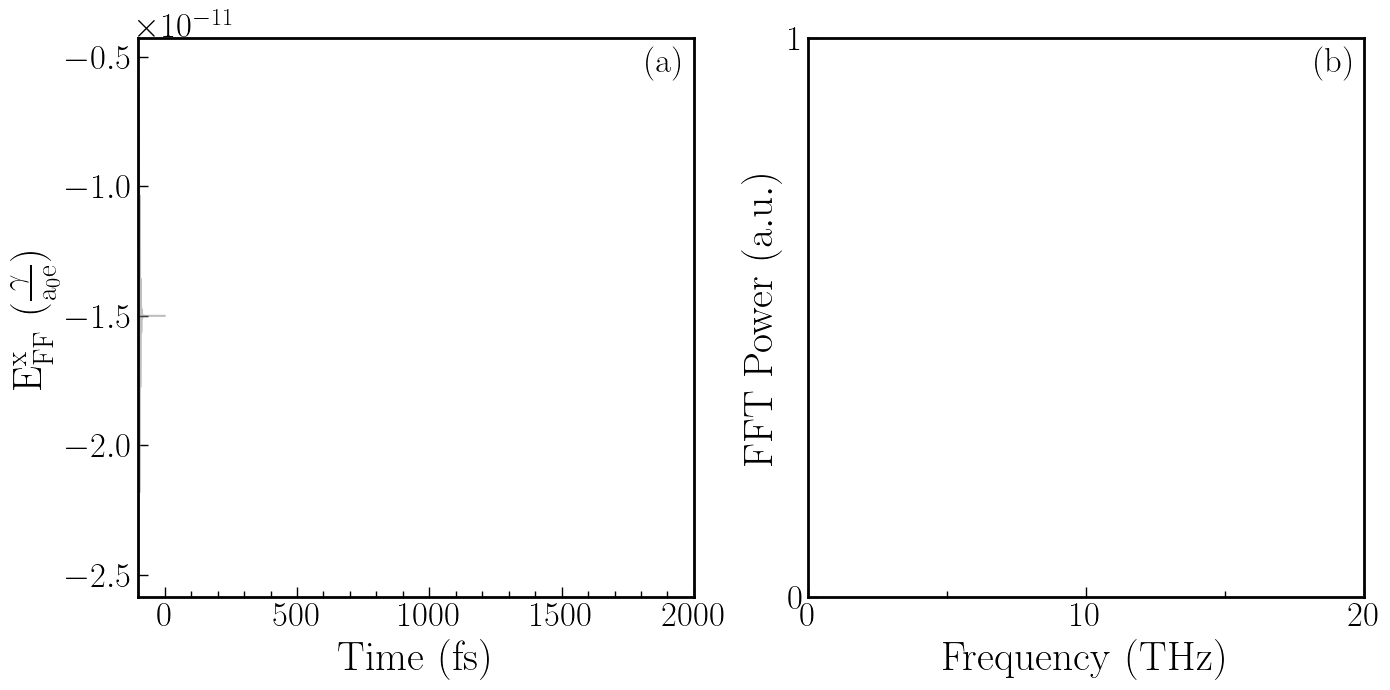

In [43]:

from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
fig,axes=plt.subplots(1,2,figsize=(14,7) )
axes=axes.reshape(2)
fig.subplots_adjust(wspace=0.25, hspace=0.15)
fs=25
axes[0].legend(fontsize=fs-1,loc= (0.02,  0.90),frameon=False ,ncol=2, columnspacing=30.)
# axes[0].plot(data3["EdtJ_disc_n20_lightdemag_rash01"][0,ti:tf]-200,data3["EdtJ_disc_n20_lightdemag_rash01"][1,ti:tf],ls='-',alpha=0.6,  color='tab:olive',lw=1,label=r'\! \! $\mathrm{Demag.} \\  \mathrm{and \ Light}$')
# axes[0].plot(data3["EdtJ_ndisc_n20_justlight_rash01"][0,ti:tf]-200,data3["EdtJ_ndisc_n20_justlight_rash01"][1,ti:tf],ls='-',alpha=0.8,  color='tab:cyan',lw=1,label=r'$\mathrm{Light}$')
#w = savgol_filter(data3["EdtJ_disc_abov1f_so01_n20"][1,ti:tf], 500, 2)
#axes[0].plot(data3["EdtJ_disc_abov1f_so01_n20"][0,ti:tf]-200,w*100,ls='-',  color='orange',lw=1,label=r'\! \! $\mathrm{Demag.}$')
axbox = axes[0].get_position()
axes[0].yaxis.set_major_locator(plt.MaxNLocator(5,integer=True))
axes[0].tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
axes[0].ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axes[0].yaxis.offsetText.set_fontsize(fs)
axes[0].set_ylabel(r'$\mathrm{E^x_{\partial_t I}\ (\frac{\gamma}{a_0 e})}$',fontsize=fs+5)
axes[0].set_ylabel(r'$\mathrm{E^x_{FF}\ (\frac{\gamma}{a_0 e})}$',fontsize=fs+5)
axes[0].tick_params(axis='both', which='major', labelsize=fs,direction='in', length=7,width=1)
axes[0].tick_params(axis='both', which='minor', labelsize=fs,direction='in', length=4)
axes[0].xaxis.set_minor_locator(MultipleLocator(100))
axes[0].xaxis.set_major_locator(MultipleLocator(500))
axes[0].set_xlabel(r'$\mathrm{Time\ (fs)}$',fontsize=fs+5)
ti=2000
tf=15000
#--------------------------------------------------------------------------------------------------
ti=2000
tf=15000
# axes[2].plot(W1[::1],F1[::1],ls ='-',markeredgecolor ='black' ,lw=1,mfc='white',ms=5,color='tab:blue',label=r'$\mathrm{Slow\ recovery}$')
# W1,F1 = fourier_transform(data3["EdtJ_disc_abov1f_so01_n20"][0,ti:tf],data3["EdtJ_disc_abov1f_so01_n20"][1,ti:tf], 0.1)
# W1 = W1[::1]*1000#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[::1],F1[::1], kind='cubic')
# x = np.arange(0,40,0.01)
# axes[1].plot(x,f(x),ls ='-',markeredgecolor ='black',lw=1,mfc='white',ms=5,color='tab:orange',label=r'$\! \! \! \! \mathrm{Demagnetization}\\ \& \ \mathrm{Fast \ recovery\ only}$')
# W1,F1 = fourier_transform(data3["EdtJ_disc_n20_lightdemag_rash01"][0,ti:tf],data3["EdtJ_disc_n20_lightdemag_rash01"][1,ti:tf], 0.1)
# W1 = W1[::1]*1000#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[::1],F1[::1], kind='cubic')
# x = np.arange(0,40,0.01)
# axes[1].plot(x,f(x),ls ='-',markeredgecolor ='black',lw=1,mfc='white',ms=5,color='tab:olive',label=r'$\! \! \! \! \mathrm{Demagnetization}\\ \& \ \mathrm{Fast \ recovery}\\ \ + \ \mathrm{fs\ laser\ pulse}$')
# W1,F1 = fourier_transform(data3["EdtJ_ndisc_n20_justlight_rash01"][0,ti:tf],data3["EdtJ_ndisc_n20_justlight_rash01"][1,ti:tf], 0.1)
# W1 = W1[::1]*1000#omega#/(2*np.pi)#*T1 
# f = interp1d(W1[::1],F1[::1], kind='cubic')
# x = np.arange(0,40,0.01)
# axes[1].plot(x,f(x),ls ='-',markeredgecolor ='black',lw=1,mfc='white',ms=5,color='tab:cyan',label=r'$\mathrm{fs\ laser\ pulse\ only}$')
index=[r'$\rm{(a)}$',r'$\rm{(b)}$',r'$\rm{(e)}$',r'$\rm{(f)}$',r'$\rm{(c)}$',r'$\rm{(d)}$',r'$\rm{(g)}$',r'$\rm{(h)}$' ]
i=0
for ax in axes:  
    axbox = ax.get_position()
    ax.text(x=0.95, y=0.94, s=index[i],fontsize=fs,ha='center', transform=ax.transAxes)
    # ax.yaxis.set_major_locator(plt.MaxNLocator(5,integer=True))
    # ax.tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
    # ax.ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
    # ax.yaxis.offsetText.set_fontsize(fs)
    i=i+1
axbox = axes[1].get_position()
#axes.text(x=0.065, y=0.93, s=index[i],fontsize=fs,ha='center', transform=ax.transAxes)
axes[1].yaxis.set_major_locator(plt.MaxNLocator(5,integer=True))
axes[1].tick_params(axis='both', which='both', labelsize=fs,direction='in', length=6,width=1)
axes[1].ticklabel_format(axis="y", style="sci", scilimits=(-1,2), useMathText=True)
axes[1].yaxis.offsetText.set_fontsize(fs)
i=i+1

axes[1].legend(fontsize=fs-5,loc= (0.01,0.62),frameon=False,handlelength=0.6)
axes[1].set_ylabel(r'$\mathrm{FFT \ Power\ (a.u.)}$',fontsize=fs+5)
axes[1].set_xlabel(r'$\mathrm{Frequency\ (THz)}$',fontsize=fs+5)
axes[1].set_xlim([0,20])
axes[1].tick_params(axis='both', which='major', labelsize=fs,direction='in', length=7,width=1)
axes[1].tick_params(axis='both', which='minor', labelsize=fs,direction='in', length=4)
axes[1].xaxis.set_minor_locator(MultipleLocator(5))
axes[1].xaxis.set_major_locator(MultipleLocator(10))

#axes[0].text(x=0.066, y=0.64, s=r'$\times 10^2$',fontsize=fs-2,ha='center',color='tab:orange', transform=axes[0].transAxes)
axes[0].set_xlim([-100,2000])
axes[0].plot(ts-200,np.array(As_0)*1e-11 - 1.5*1e-11,color = 'gray',alpha = 0.5)
#axes[0].text(x=0.3, y=0.22, s=r'$\mathrm{A^x}(t)$',fontsize=fs,ha='center',color='grey', transform=axes[0].transAxes)
plt.tight_layout()


